In [36]:
import pandas
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use( 'bmh' ) 

In [45]:
from skbio import Protein 
protein = Protein.read( '../../reference/bglb.pep' ) 

In [74]:
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [75]:
raw = pandas.read_csv( 'plos_raw_data.csv' ) 
raw[ 'sample' ] = raw[ 'sample' ].str.upper()
g = raw.groupby( 'sample' ) 

In [76]:
# sanity check the names, I shudder 
for i in raw['sample'].unique():
    if not '+' in i:
        if not str(protein[int(i[1:-1])-1]) == i[0]:
            print( i ) 

M223G
F75A
N407A
E17S


In [77]:
raw.sample(5)

,plate,sample,yield,dilution,well,maxv,kobs,s,correction
1797,30.0,R240K,1.400,0.01,e11,4.630000e-03,3.000000e+01,0.00029,1.57e-07
702,17.0,N220H,1.118,0.01,a10,1.370000e-02,1.110000e+02,0.07500,4.81e-07
938,2.0,E154D,1.420,0.01,c7,6.920000e-02,4.410000e+02,0.00469,2.90e-07
1030,20.0,Q313R,0.690,0.01,h6,-3.290000e-17,-4.320000e-13,0.00000,4.26e-07
834,19.0,C167Q,0.938,0.01,g2,2.640000e-04,2.550000e+00,0.00002,3.65e-07


In [78]:
df = pandas.read_csv( 'plos_data_set.csv', index_col=0 ) 
df[ 'km' ] = df[ 'km' ] / 1000 
df.sample( 5 ) 

,y,km,ekm,kcat,ekcat,ki,eki,kcatkm,ekcatkm
name,,,,,,,,,
S298E,1.10,0.00528,0.05,809.0,2.0,NaN,NaN,153264.0,1391.0
E177A,0.96,0.00598,0.22,986.0,10.0,NaN,NaN,164804.0,6408.0
W407A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H379R,0.14,0.00624,0.84,2.0,1.0,NaN,NaN,380.0,53.0
W120A,0.16,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [79]:
def v( x, kcat, km ): return (x*kcat)/(x+km)
x_vals = np.linspace( 0, 0.075, 50 ) 

In [80]:
def my_curve_fit( f, xdata, ydata, p0 ):
    null_return = ( [ np.nan, np.nan ], [ np.nan, np.nan ] )
    try:
        curve_return = curve_fit( f, xdata, ydata, p0 )
        if len( curve_return ) == 2:
            errors = np.sqrt( np.diag( curve_return[1] ) ) 
            return curve_return[0], errors 
        else:
            return null_return
    except:
        return null_return

In [81]:
mm_fits = pandas.DataFrame( columns=[ 'kcat', 'km', 'err_kcat', 'err_km' ] ) 
for idx, data in raw.groupby( 'sample' ):
    params, std_err = my_curve_fit( v, data.s, data.kobs, ( data.kobs.max(), .1 ) )
    mm_fits.loc[ idx ] = np.append( params, std_err )

In [82]:
good_fits = pandas.DataFrame( columns=[ 'kcat', 'km', 'err_kcat', 'err_km' ] )
for idx, data in mm_fits.iterrows():
    if data.kcat > data.err_kcat and data.km > data.err_km:
        good_fits.loc[ idx ] = data 
    else:
        good_fits.loc[ idx ] = ( np.nan, np.nan, np.nan, np.nan )
        
good_fits

,kcat,km,err_kcat,err_km
A192S,945.844848,0.005089,9.727656,0.000184
C167A,478.943181,0.014565,14.377549,0.001267
C167N+W120R,0.359278,0.026205,0.078615,0.014668
C167Q,503.672211,0.004918,5.540024,0.000192
D403A,1.190297,0.044017,0.270520,0.021601
E154D,878.077456,0.003457,46.700318,0.000756
E164A,0.191305,0.001005,0.006911,0.000170
E177A,986.184022,0.005984,9.964425,0.000225
E177K,554.938646,0.006193,7.277064,0.000300
E177L,669.545893,0.007483,10.055073,0.000364


In [83]:
def lin_f( x, m, b ):
    return m*x+b

In [84]:
# try linear fits as well! 

lin_fits = pandas.DataFrame( columns=[ 'lin_slope', 'lin_intercept', 'rvalue', 'pvalue', 'lin_std_err' ] ) 
for idx, data in raw.groupby( 'sample' ):
    lin_fit = linregress( data.s, data.kobs ) 
    lin_fits.loc[ idx ] = lin_fit
    
lin_fits

,lin_slope,lin_intercept,rvalue,pvalue,lin_std_err
A192S,12051.934790,150.260271,0.801829,4.222203e-06,1959.940697
C167A,5409.873281,37.052726,0.893646,2.888156e-17,404.987050
C167N+W120R,3.617809,0.010482,0.831461,4.815962e-07,0.515397
C167Q,6291.519765,80.718122,0.774036,1.467340e-05,1123.015395
D403A,9.843562,0.044248,0.909657,7.388843e-10,0.958272
E154D,10398.217522,167.754858,0.753494,2.132404e-05,1934.344031
E164A,2.176690,0.056257,0.714156,1.294430e-04,0.465568
E177A,11808.553974,141.602640,0.838763,3.067043e-07,1634.338613
E177K,6507.207014,79.122380,0.822584,8.106105e-07,959.054214
E177L,8313.927125,85.128079,0.830289,9.477473e-07,1217.818564


A192S 
 MM params (kcat, km): [  9.45844848e+02   5.08935820e-03] 
 linear params (slope, int): [ 12051.93479003    150.26027088]


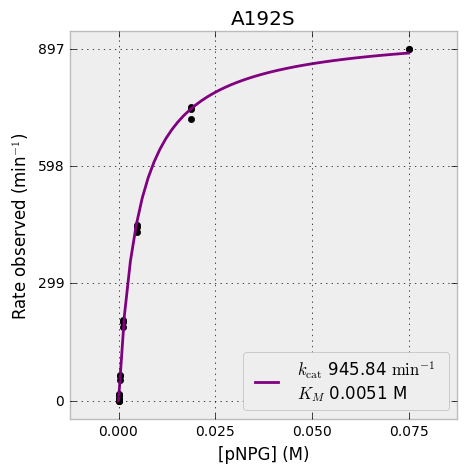

C167A 
 MM params (kcat, km): [  4.78943181e+02   1.45647384e-02] 
 linear params (slope, int): [ 5409.87328124    37.05272595]


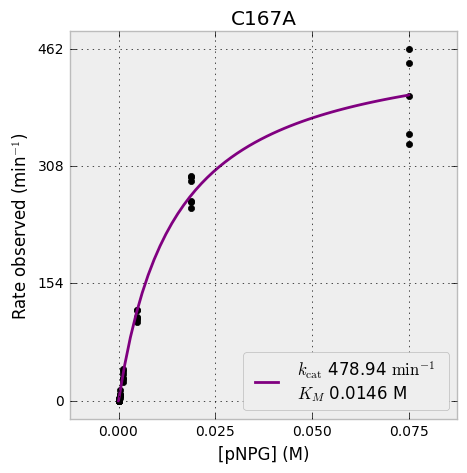

C167N+W120R 
 MM params (kcat, km): [ 0.3592781  0.0262045] 
 linear params (slope, int): [ 3.61780873  0.01048191]


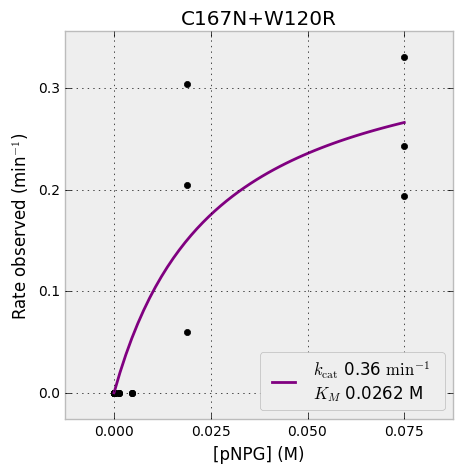

C167Q 
 MM params (kcat, km): [  5.03672211e+02   4.91797275e-03] 
 linear params (slope, int): [ 6291.51976455    80.71812168]


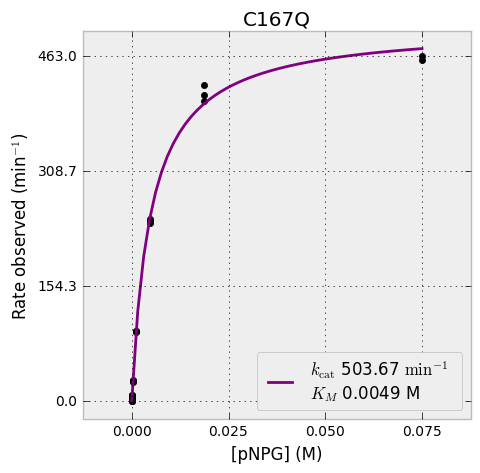

D403A 
 MM params (kcat, km): [ 1.19029689  0.04401679] 
 linear params (slope, int): [ 9.84356249  0.04424777]


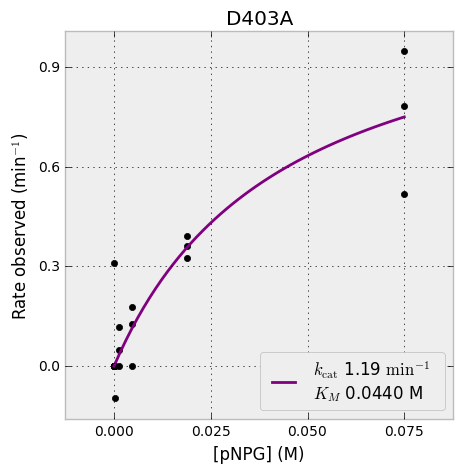

E154D 
 MM params (kcat, km): [  8.78077456e+02   3.45693834e-03] 
 linear params (slope, int): [ 10398.21752212    167.75485756]


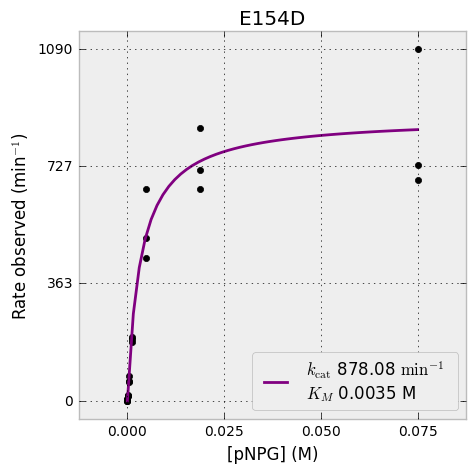

E164A 
 MM params (kcat, km): [ 0.19130506  0.00100516] 
 linear params (slope, int): [ 2.17668954  0.05625745]


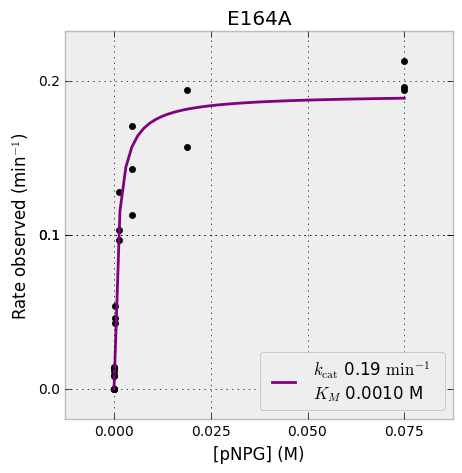

E177A 
 MM params (kcat, km): [  9.86184022e+02   5.98397996e-03] 
 linear params (slope, int): [ 11808.55397388    141.60264019]


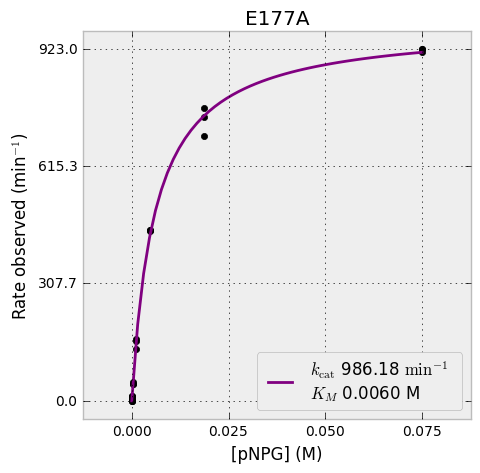

E177K 
 MM params (kcat, km): [  5.54938646e+02   6.19287119e-03] 
 linear params (slope, int): [ 6507.20701427    79.12237966]


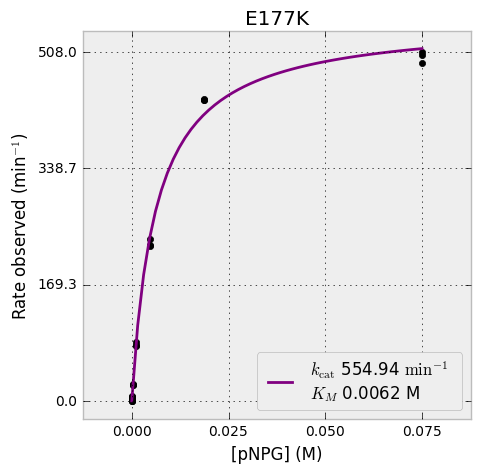

E177L 
 MM params (kcat, km): [  6.69545893e+02   7.48277681e-03] 
 linear params (slope, int): [ 8313.9271252    85.1280789]


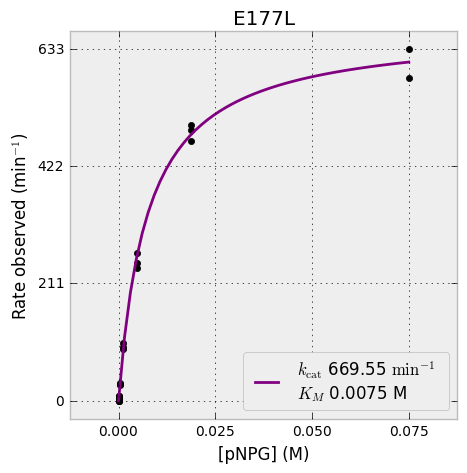

E17S 
 MM params (kcat, km): [  6.41188279e+02   7.31981295e-03] 
 linear params (slope, int): [ 7504.46786607    82.40478226]


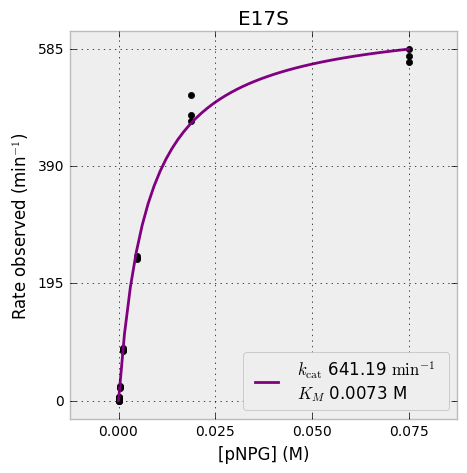

E222A 
 MM params (kcat, km): [  8.98792842e+01   6.25896583e-04] 
 linear params (slope, int): [ 668.4426853    35.52071865]


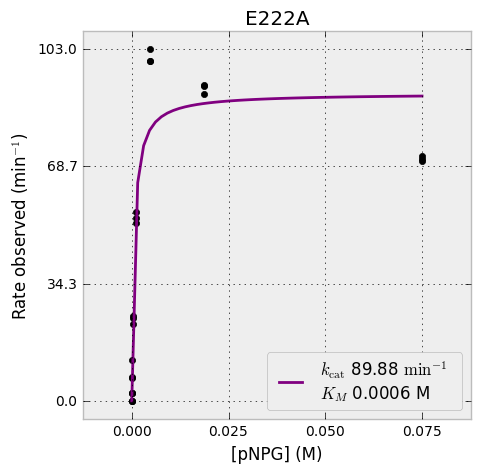

E222H 
 MM params (kcat, km): [  1.59713231e+02   8.54293102e-03] 
 linear params (slope, int): [ 2000.31721409    18.45920158]


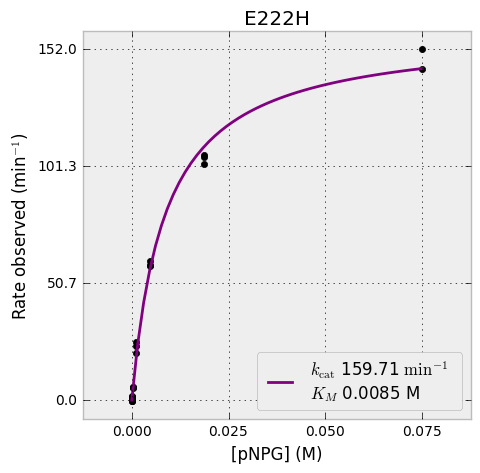

E222K 
 MM params (kcat, km): [  1.07998434e+02   7.22178945e-03] 
 linear params (slope, int): [ 1250.04861135    13.98991325]


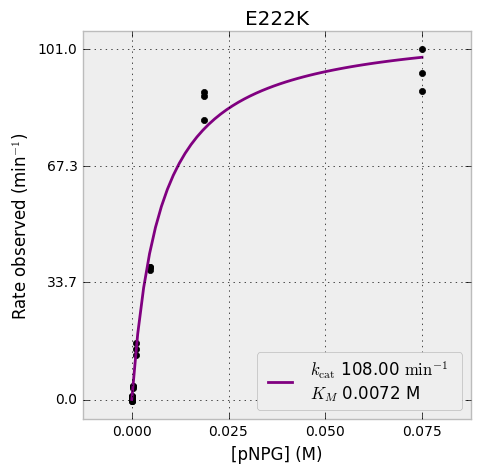

E222Q 
 MM params (kcat, km): [  6.67634507e+02   1.21557432e-02] 
 linear params (slope, int): [ 7595.98037065    58.71468618]


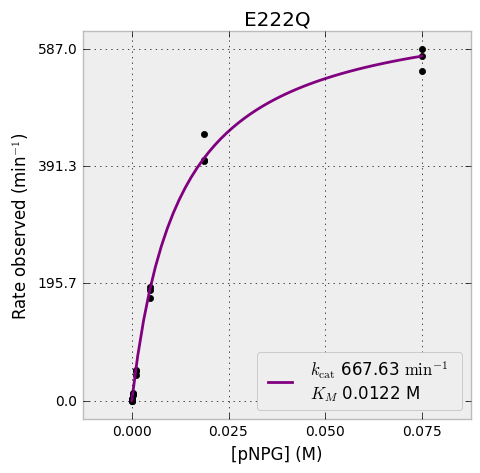

E222R 
 MM params (kcat, km): [  4.23183470e+01   2.47504465e-03] 
 linear params (slope, int): [ 473.71839288    9.59950318]


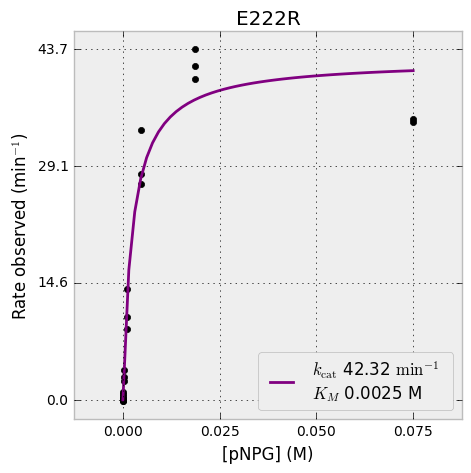

E222Y 
 MM params (kcat, km): [ 11.72690383   0.01843175] 
 linear params (slope, int): [ 130.75111612    0.8422531 ]


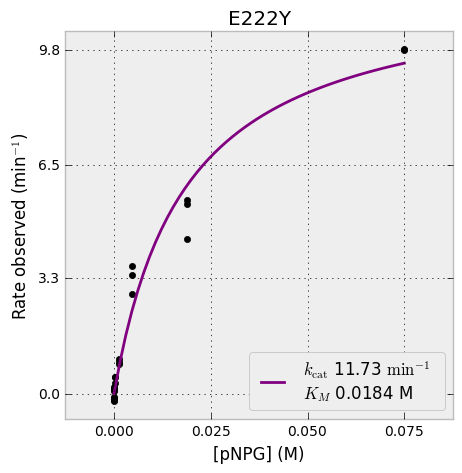

E353A 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 1.96356477  0.00674623]


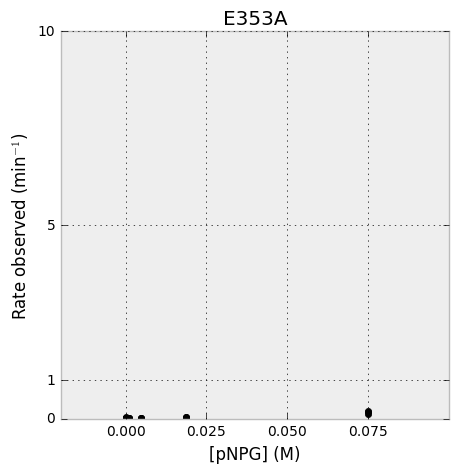

E406A 
 MM params (kcat, km): [ 0.96406315  0.11750539] 
 linear params (slope, int): [ 4.63823065  0.03038927]


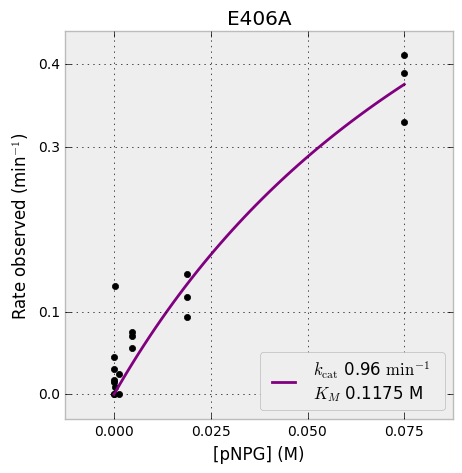

E406D 
 MM params (kcat, km): [  3.91026864e+01   3.41286289e-02] 
 linear params (slope, int): [ 358.14340099    1.51939267]


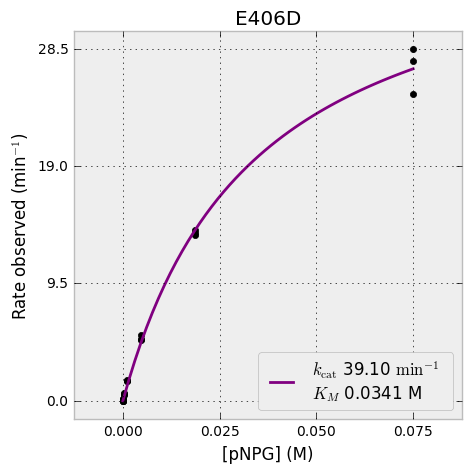

E423S 
 MM params (kcat, km): [  6.45637401e+02   6.60314731e-03] 
 linear params (slope, int): [ 7939.50622164    89.0477322 ]


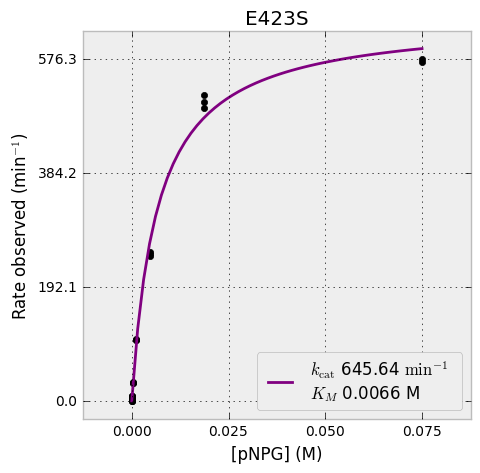

F405A 
 MM params (kcat, km): [ 0.5654233   0.00353044] 
 linear params (slope, int): [ 6.14614003  0.08462201]


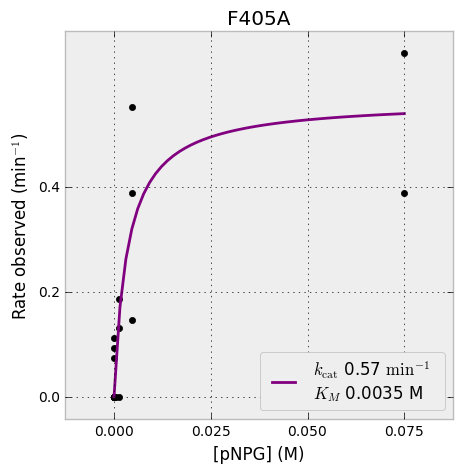

F415A 
 MM params (kcat, km): [ 1.32252173  0.01663085] 
 linear params (slope, int): [ 14.56323122   0.09170995]


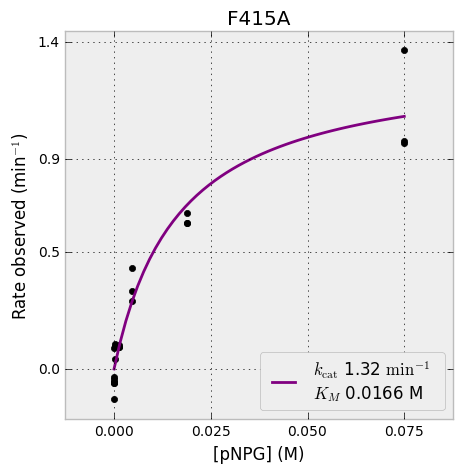

F75A 
 MM params (kcat, km): [  6.13345789e+02   5.46539148e-03] 
 linear params (slope, int): [ 7376.68275118    95.48193646]


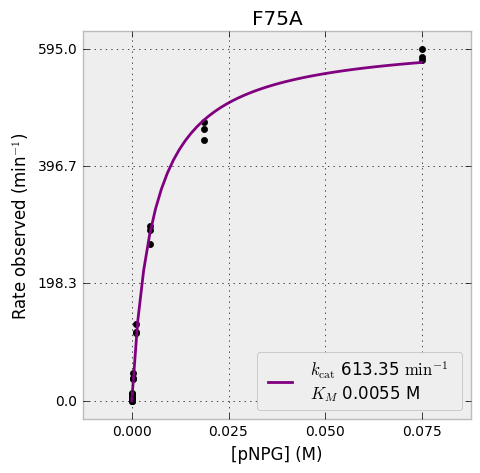

G355A 
 MM params (kcat, km): [ 1.01770742  0.00591481] 
 linear params (slope, int): [ 13.18810617   0.15952486]


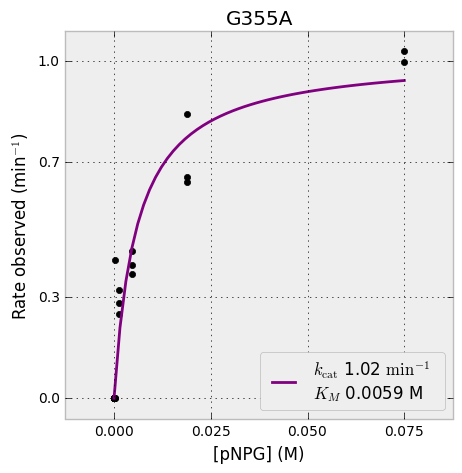

H101R 
 MM params (kcat, km): [  1.05911515e+03   1.06221656e-02] 
 linear params (slope, int): [ 12259.69898202    108.86492068]


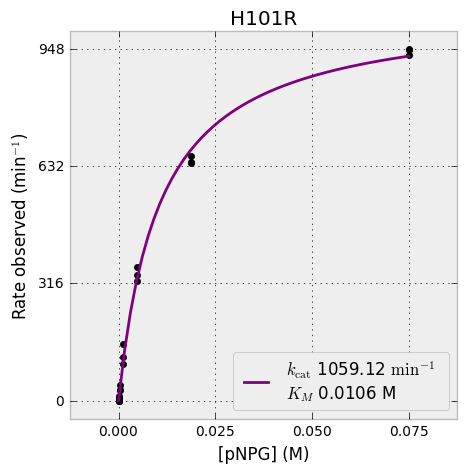

H119A 
 MM params (kcat, km): [  1.43234606e+02   1.51041679e-02] 
 linear params (slope, int): [ 1556.26076193    11.97139038]


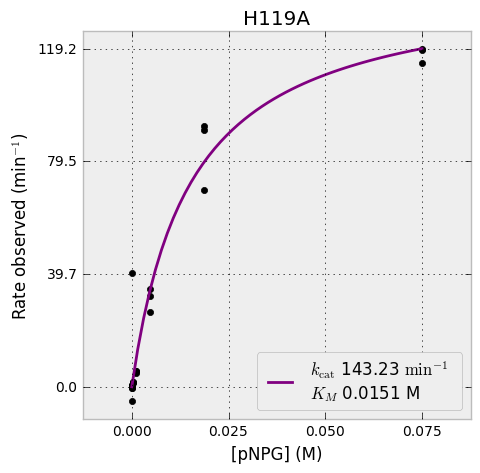

H119E 
 MM params (kcat, km): [ 0.68182169  0.17679782] 
 linear params (slope, int): [ 2.69945865  0.00443751]


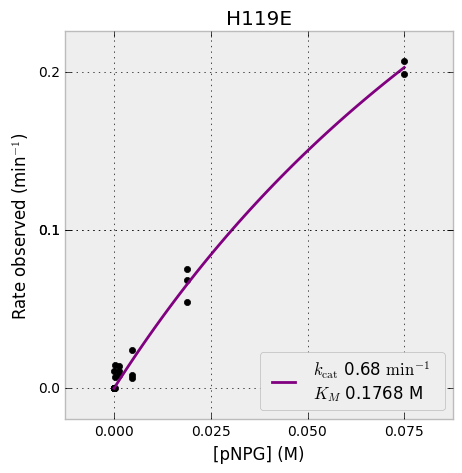

H119N 
 MM params (kcat, km): [ 1.89696324  0.02321579] 
 linear params (slope, int): [ 19.2496423    0.10240516]


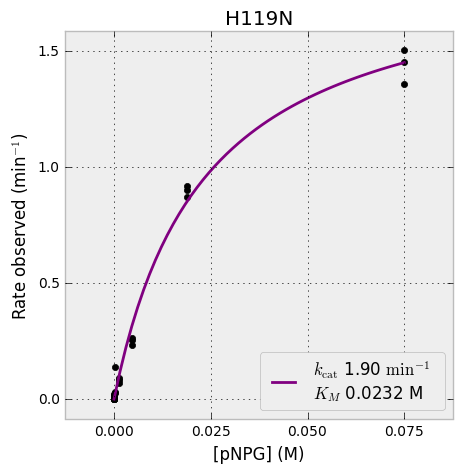

H178A 
 MM params (kcat, km): [  1.12761662e+02   7.67245363e-03] 
 linear params (slope, int): [ 1373.73381764    13.76935231]


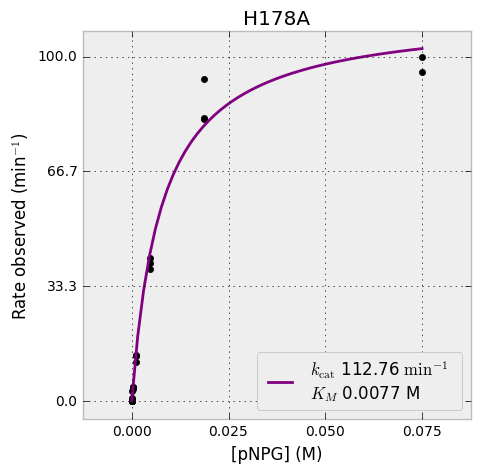

H315N 
 MM params (kcat, km): [  4.76979042e+01   4.97096813e-03] 
 linear params (slope, int): [ 565.72082227    7.78815521]


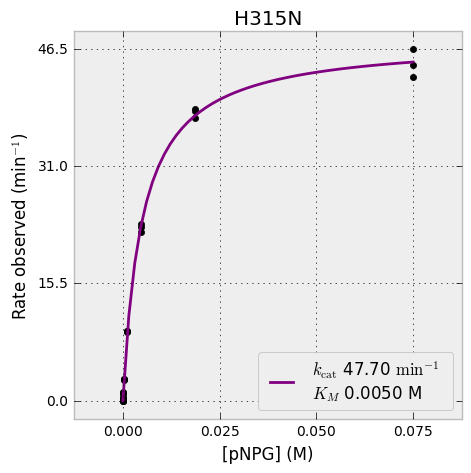

H373R 
 MM params (kcat, km): [  7.07355486e+02   6.30615036e-03] 
 linear params (slope, int): [ 8477.60318127    97.8927559 ]


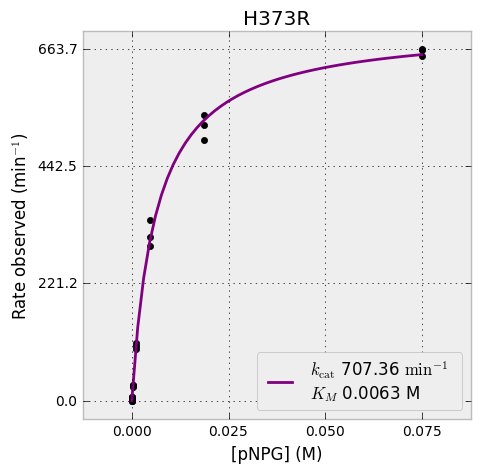

H379R 
 MM params (kcat, km): [ 2.37383969  0.00624011] 
 linear params (slope, int): [ 28.43929777   0.36847142]


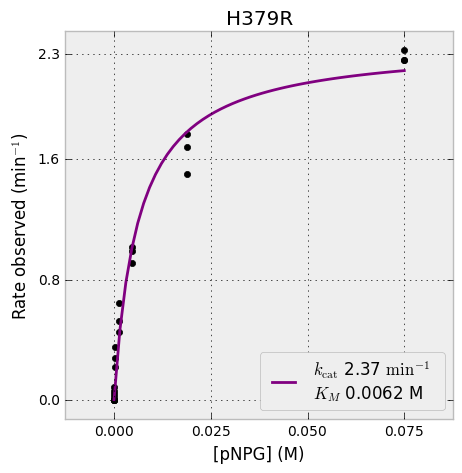

I244E 
 MM params (kcat, km): [  4.96640712e+02   5.97396307e-03] 
 linear params (slope, int): [ 6188.0394079     73.91869662]


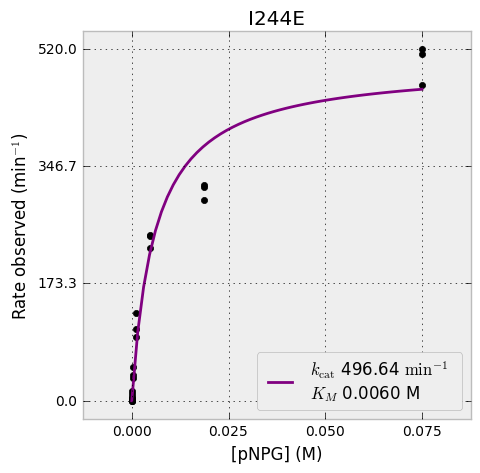

I244N 
 MM params (kcat, km): [  2.71438837e+02   2.15127086e-03] 
 linear params (slope, int): [ 3100.79318938    66.57854446]


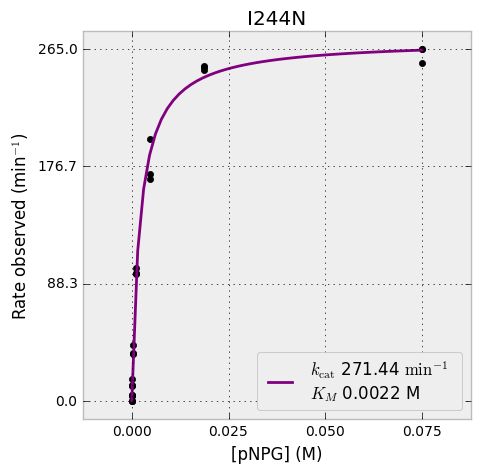

I300N 
 MM params (kcat, km): [  6.93375183e+02   4.48111374e-03] 
 linear params (slope, int): [ 8409.21446893   119.53283066]


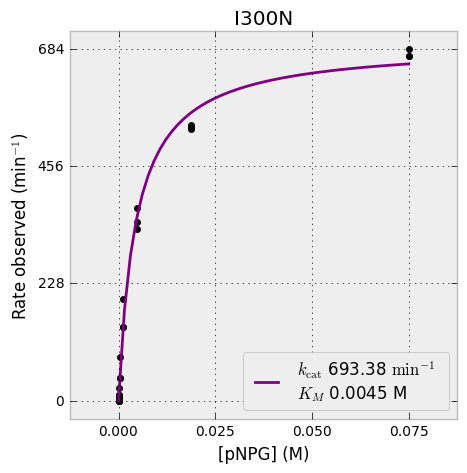

I91E 
 MM params (kcat, km): [  8.46139149e+02   6.71160721e-03] 
 linear params (slope, int): [ 11235.68903122    102.93394692]


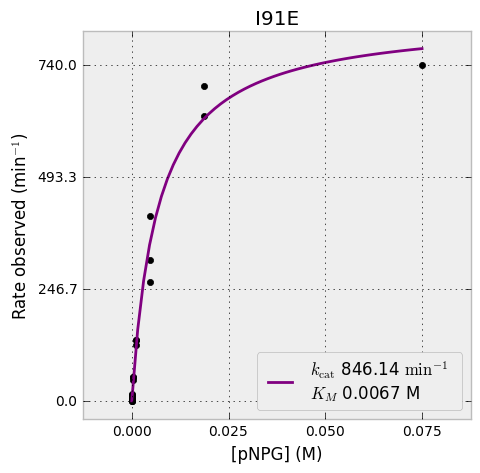

K341A 
 MM params (kcat, km): [  1.04589408e+03   5.45621744e-03] 
 linear params (slope, int): [ 12311.93580752    166.54160899]


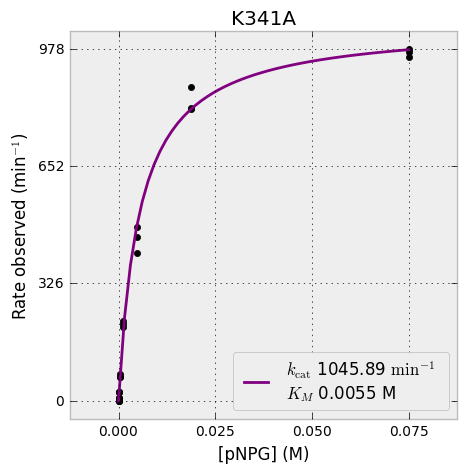

K413A 
 MM params (kcat, km): [  8.34751191e+02   2.92015998e-03] 
 linear params (slope, int): [ 9708.63322799   167.95422387]


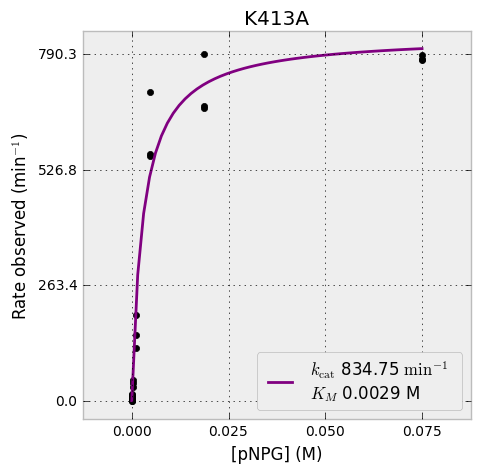

L171A 
 MM params (kcat, km): [  8.06787115e+02   1.10945540e-02] 
 linear params (slope, int): [ 9242.79907894    80.32114835]


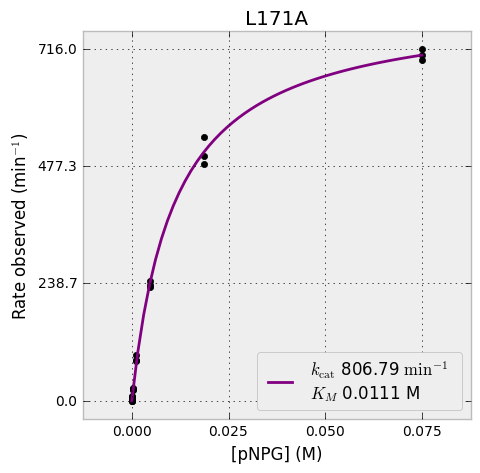

L171R 
 MM params (kcat, km): [  4.03472131e+02   3.35817245e-03] 
 linear params (slope, int): [ 4693.32635559    79.36053721]


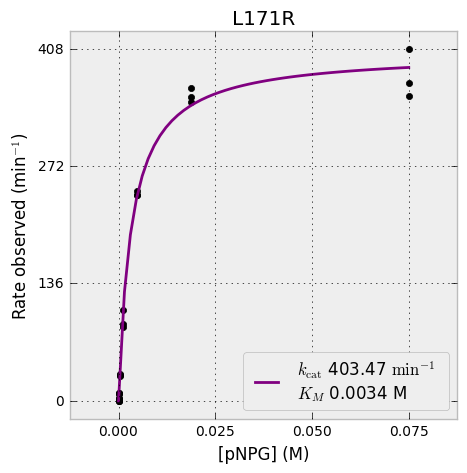

L219A 
 MM params (kcat, km): [  1.98723194e+02   7.86663172e-03] 
 linear params (slope, int): [ 2439.19982338    24.28738273]


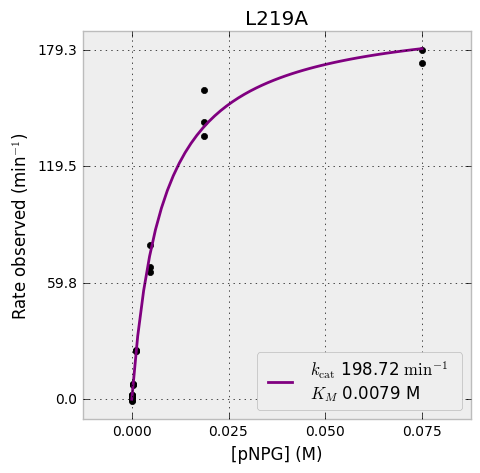

M221A 
 MM params (kcat, km): [  5.47090000e+02   6.24858936e-03] 
 linear params (slope, int): [ 6845.16539834    77.12619523]


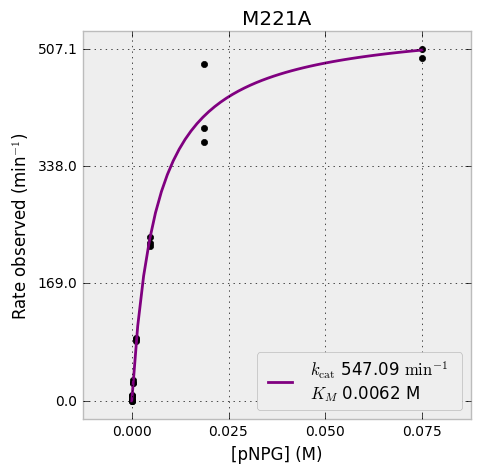

M223G 
 MM params (kcat, km): [  1.53672804e+02   1.92139893e-02] 
 linear params (slope, int): [ 1691.60417076     8.10607564]


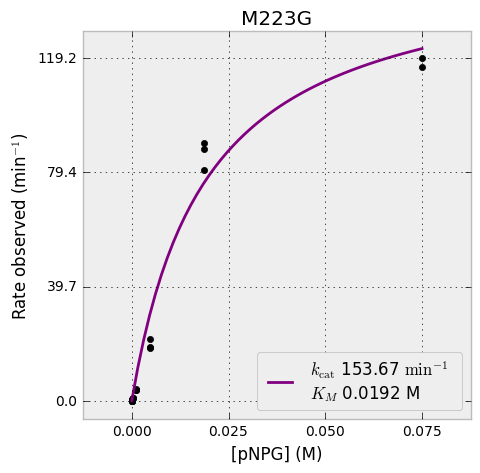

M261E 
 MM params (kcat, km): [  6.16334300e+01   1.01202677e-02] 
 linear params (slope, int): [ 701.56140955    8.29135933]


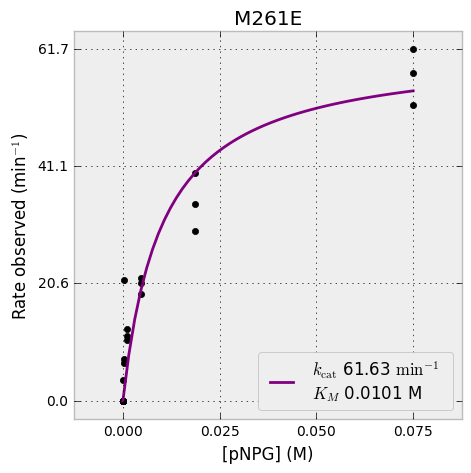

M323A 
 MM params (kcat, km): [  4.15572879e+02   9.34362744e-03] 
 linear params (slope, int): [ 4778.04447694    44.99099993]


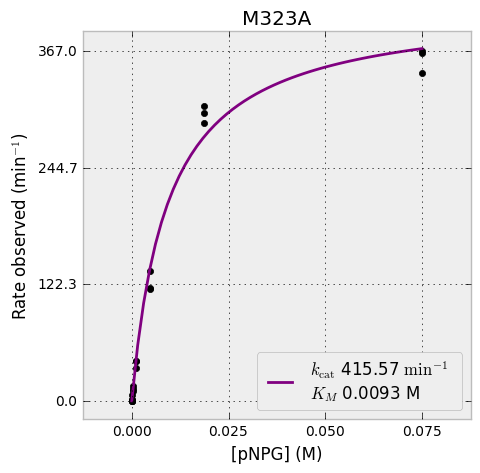

M323K 
 MM params (kcat, km): [ 1.19935925  0.01705892] 
 linear params (slope, int): [ 12.27036125   0.06573655]


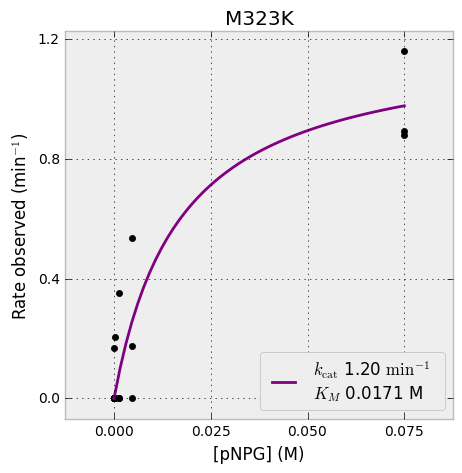

M358T 
 MM params (kcat, km): [  4.36149595e+02   4.83318697e-03] 
 linear params (slope, int): [ 5242.1654432     75.36351383]


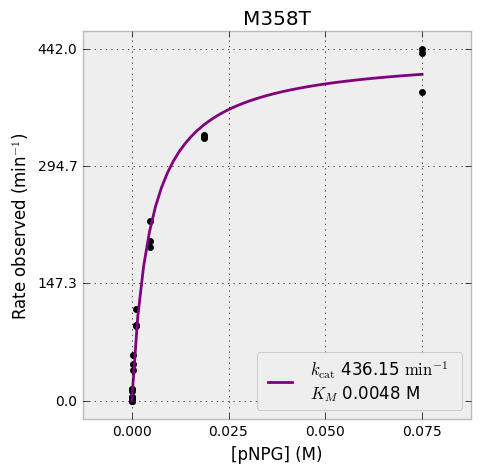

N163A 
 MM params (kcat, km): [ 6.66235393  0.01194539] 
 linear params (slope, int): [ 75.17986605   0.61535515]


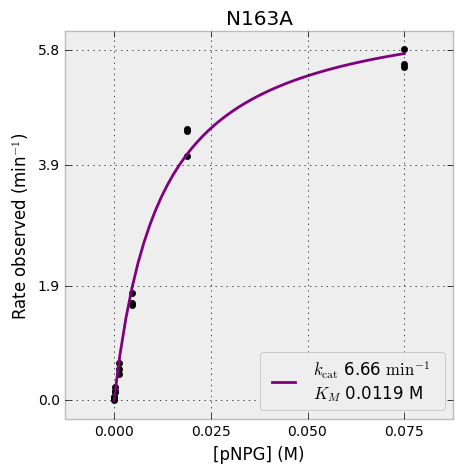

N163C 
 MM params (kcat, km): [  2.58405344e+01   5.42224217e-03] 
 linear params (slope, int): [ 309.07028956    3.99258272]


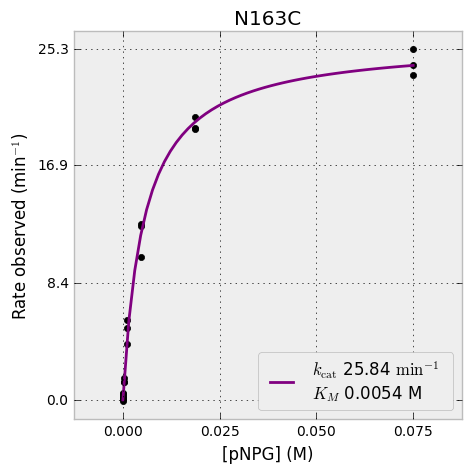

N163D 
 MM params (kcat, km): [ 11.98312114   0.01519296] 
 linear params (slope, int): [ 132.28722928    0.99241458]


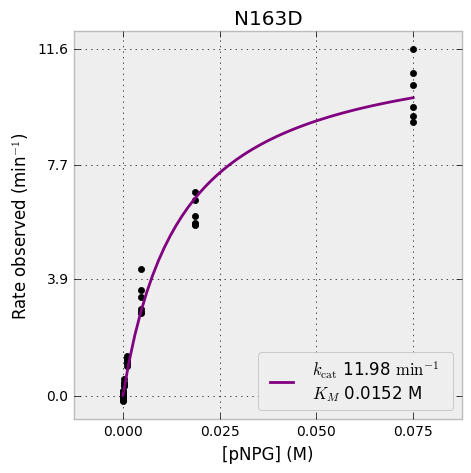

N220A 
 MM params (kcat, km): [  4.04924686e+02   1.02706579e-02] 
 linear params (slope, int): [ 4639.79565667    40.8836207 ]


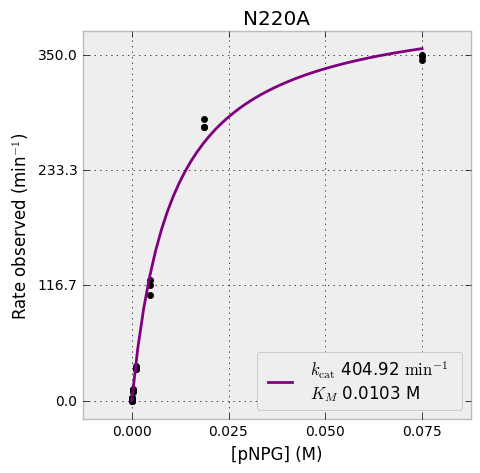

N220D+N293D 
 MM params (kcat, km): [ 0.86108791  0.03405536] 
 linear params (slope, int): [ 7.94652808  0.02988   ]


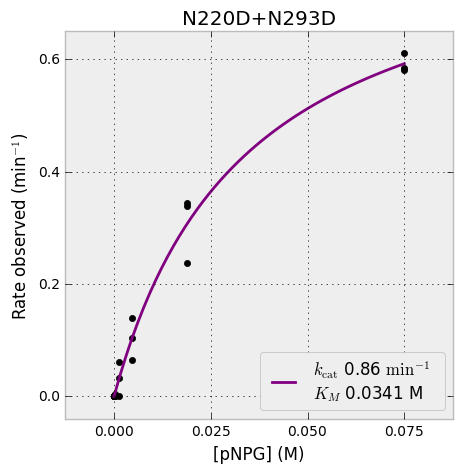

N220H 
 MM params (kcat, km): [  1.22611887e+02   5.13571024e-03] 
 linear params (slope, int): [ 1462.42677559    19.53691001]


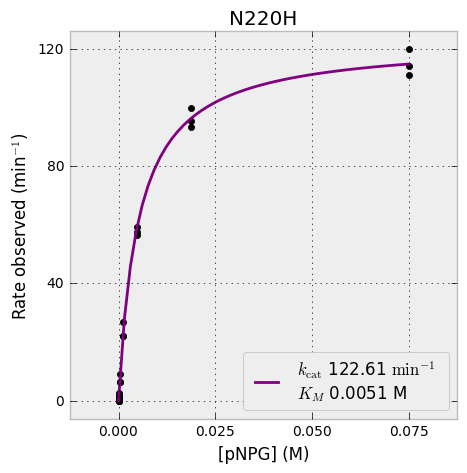

N293A 
 MM params (kcat, km): [  1.27037955e+01   9.67385978e-03] 
 linear params (slope, int): [ 154.58889426    1.35751028]


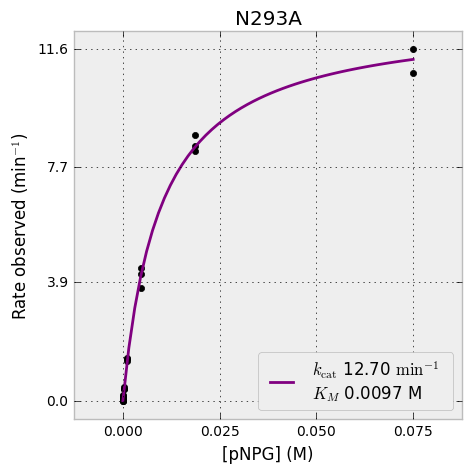

N354A 
 MM params (kcat, km): [ 2.94676757  0.00538497] 
 linear params (slope, int): [ 38.30879561   0.45017218]


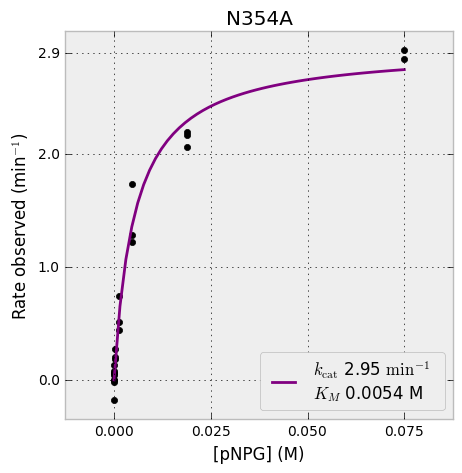

N404A 
 MM params (kcat, km): [ 3.70489679  0.00941533] 
 linear params (slope, int): [ 43.390145     0.40932576]


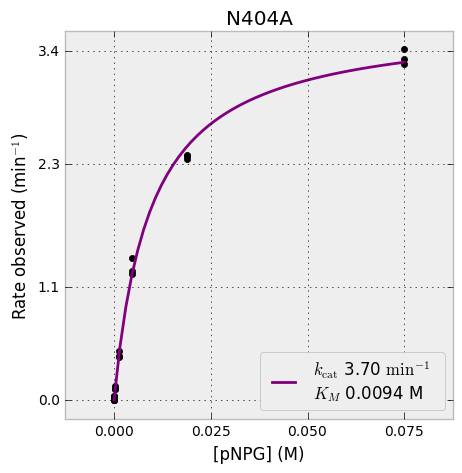

N407A 
 MM params (kcat, km): [  4.95185753e+01   1.10916811e-02] 
 linear params (slope, int): [ 595.76119747    5.07196537]


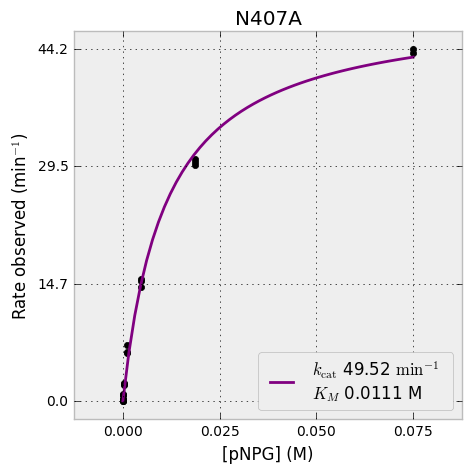

P329W 
 MM params (kcat, km): [ 0.36729459  0.02138273] 
 linear params (slope, int): [ 3.75474831  0.01564496]


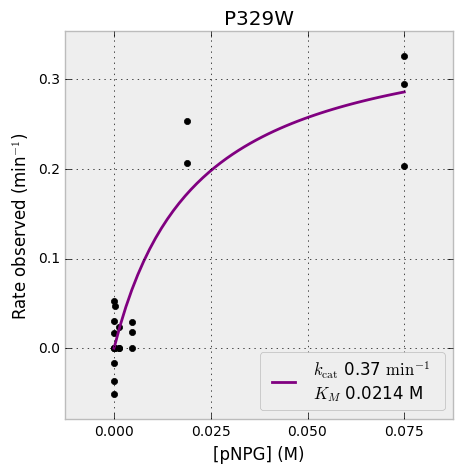

Q19A 
 MM params (kcat, km): [ 0.36071593  0.03219021] 
 linear params (slope, int): [ 3.29415752  0.01489683]


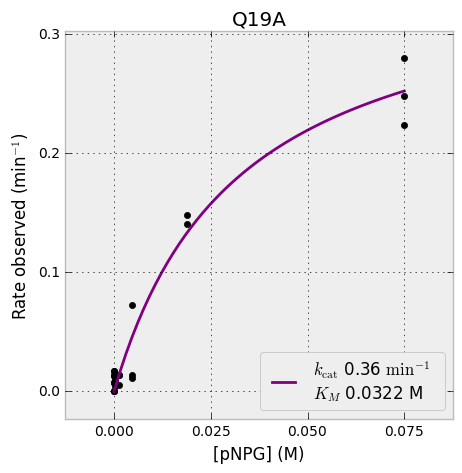

Q19C 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 8.17092489 -0.0631396 ]


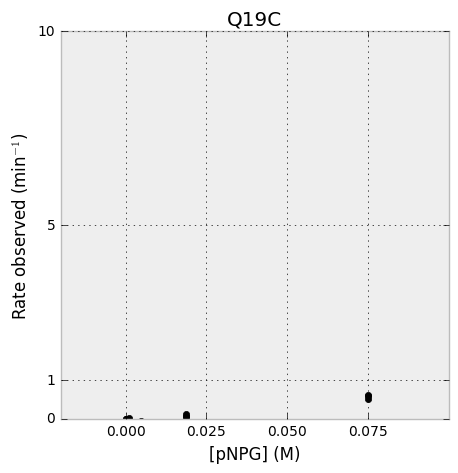

Q19S 
 MM params (kcat, km): [ 0.72076797  0.05723507] 
 linear params (slope, int): [ 5.44405516  0.01641862]


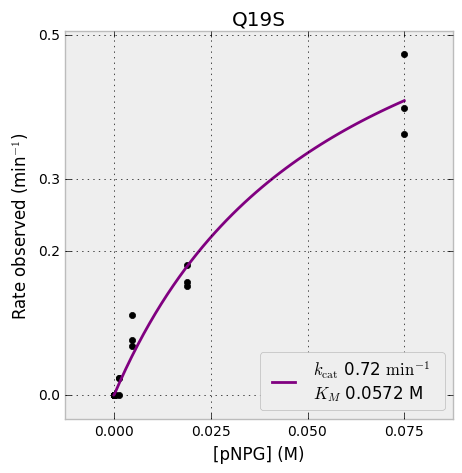

Q284R 
 MM params (kcat, km): [  3.69774910e+02   9.68446057e-03] 
 linear params (slope, int): [ 4250.23405062    39.93736933]


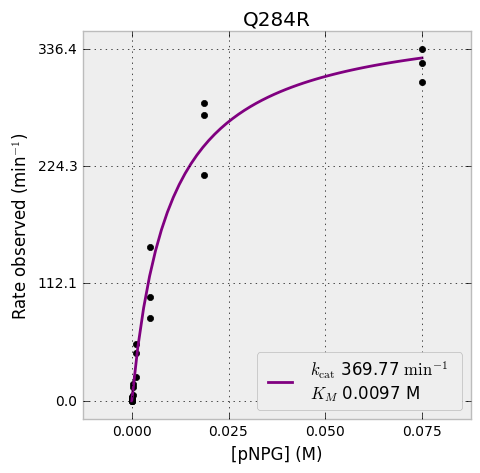

Q313R 
 MM params (kcat, km): [  6.89252257e+02   3.58288339e-03] 
 linear params (slope, int): [ 8266.8461743    131.12267305]


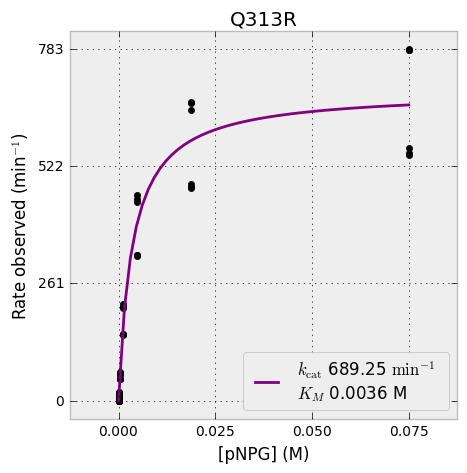

R240A 
 MM params (kcat, km): [  1.10105911e+04   1.94614983e-02] 
 linear params (slope, int): [ 120801.82475675     718.5701515 ]


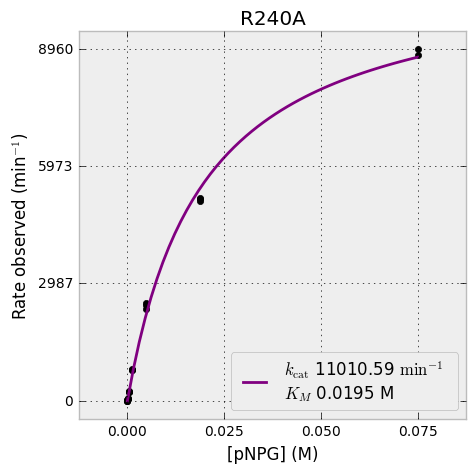

R240D 
 MM params (kcat, km): [  2.82270186e+02   1.08180055e-02] 
 linear params (slope, int): [ 3232.19700946    27.77103596]


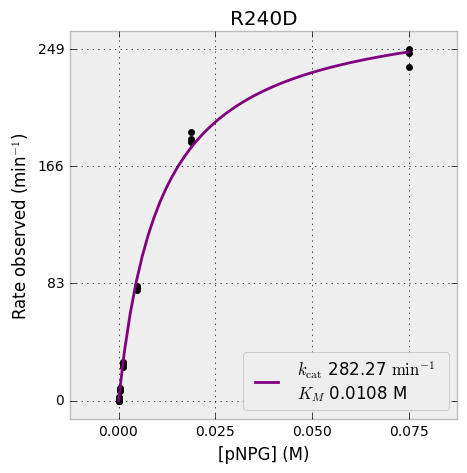

R240K 
 MM params (kcat, km): [  8.98314480e+02   1.76732108e-02] 
 linear params (slope, int): [ 9639.17567775    70.263503  ]


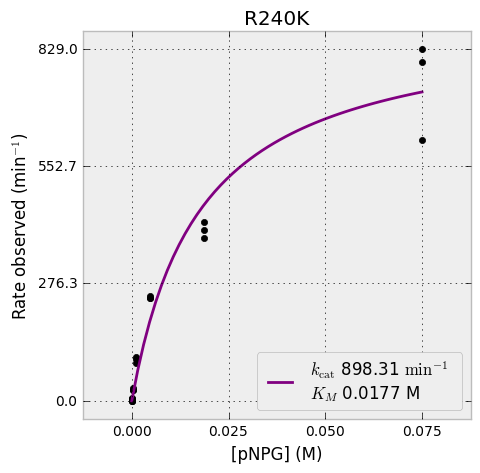

R76A 
 MM params (kcat, km): [ 2.60455592  0.013534  ] 
 linear params (slope, int): [ 28.72447922   0.27139658]


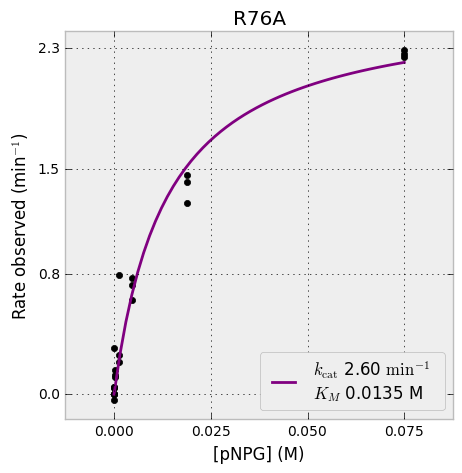

S14A 
 MM params (kcat, km): [  3.20476300e+02   8.25494117e-03] 
 linear params (slope, int): [ 3802.43133963    41.621185  ]


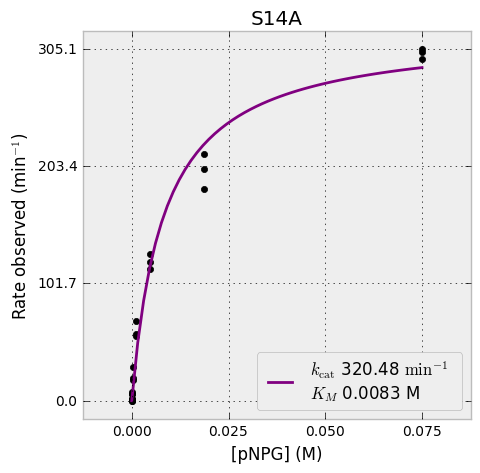

S16A 
 MM params (kcat, km): [  1.54044417e+02   1.40084316e-02] 
 linear params (slope, int): [ 1693.14993273    14.33294612]


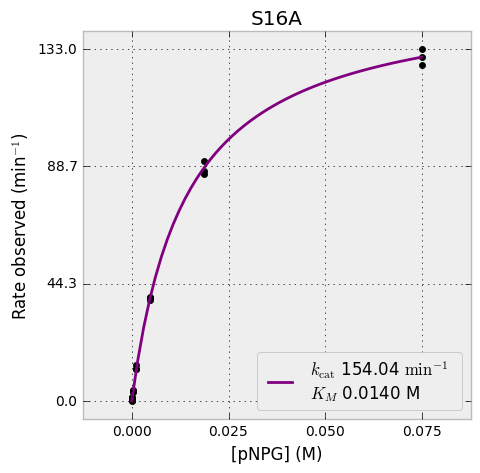

S17A 
 MM params (kcat, km): [  8.48458338e+02   1.84541320e-02] 
 linear params (slope, int): [ 10304.3645237      60.82688256]


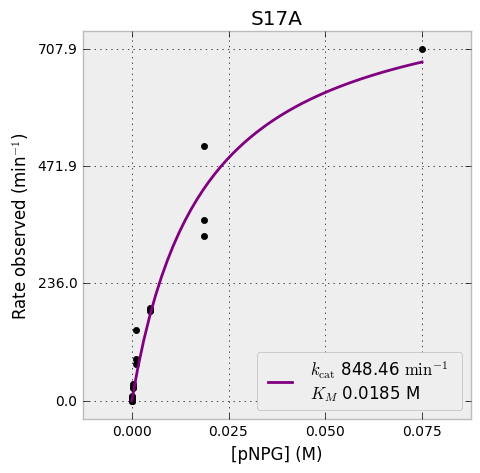

S298E 
 MM params (kcat, km): [  8.09167467e+02   5.27956809e-03] 
 linear params (slope, int): [ 9651.4228559    126.25524108]


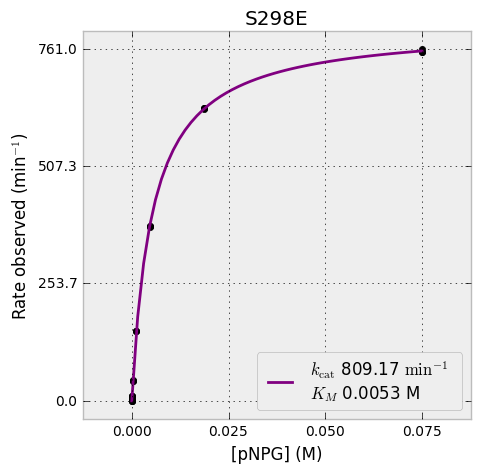

S331A 
 MM params (kcat, km): [  8.16802399e+02   4.33763915e-03] 
 linear params (slope, int): [ 9670.95603092   142.09888831]


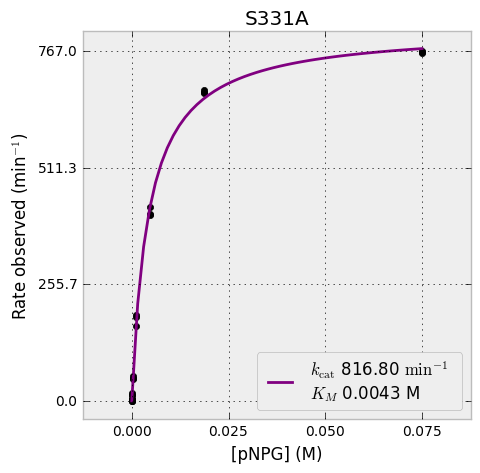

S400A 
 MM params (kcat, km): [  5.30681288e+02   3.22023151e-03] 
 linear params (slope, int): [ 6434.39129293   107.81481849]


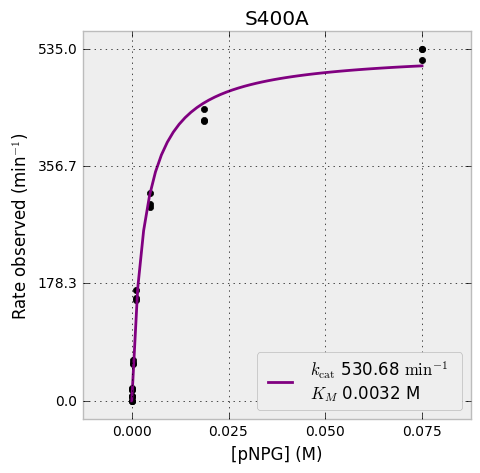

T175R 
 MM params (kcat, km): [  8.01263869e+02   3.59258278e-03] 
 linear params (slope, int): [ 9586.32956038   152.16453007]


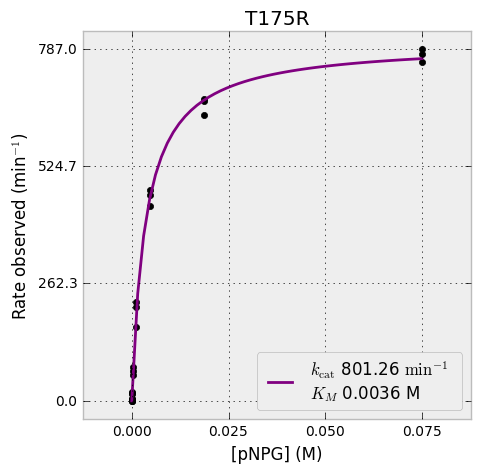

T218A 
 MM params (kcat, km): [  4.64362329e+02   6.51479414e-03] 
 linear params (slope, int): [ 5535.86854912    62.90316637]


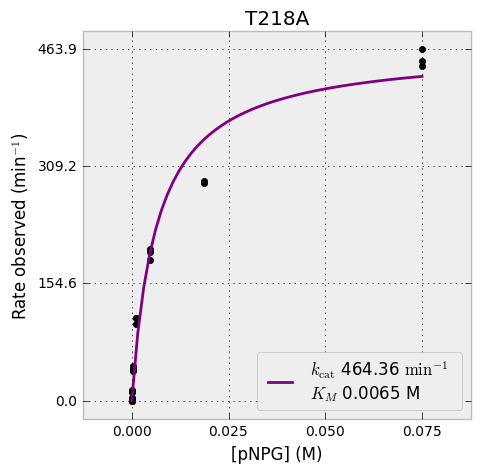

T296A 
 MM params (kcat, km): [  1.09415038e+02   1.10477828e-02] 
 linear params (slope, int): [ 1244.85324247    10.6113072 ]


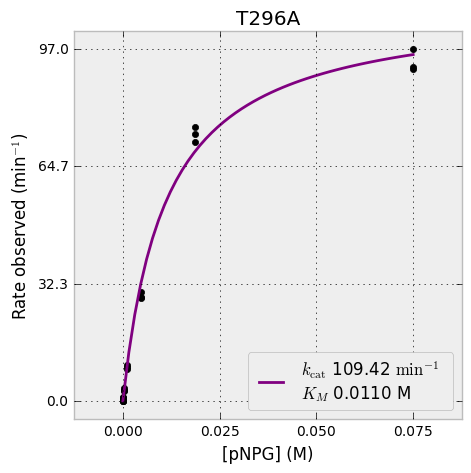

T352A 
 MM params (kcat, km): [  5.95144953e+01   1.42579304e-02] 
 linear params (slope, int): [ 659.28702392    5.0083766 ]


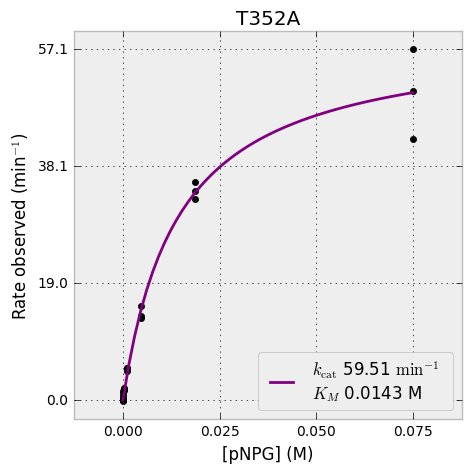

V147S 
 MM params (kcat, km): [ 4.55826027  0.00645276] 
 linear params (slope, int): [ 52.86025682   0.64602598]


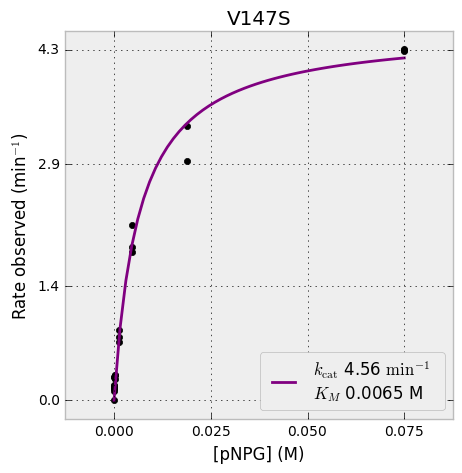

V52G 
 MM params (kcat, km): [  6.87495054e+02   8.24626488e-03] 
 linear params (slope, int): [ 8125.37841196    84.45480157]


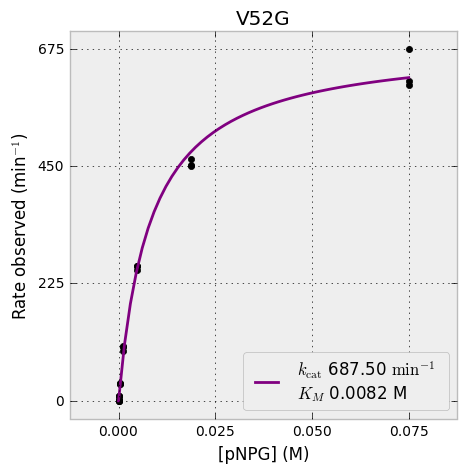

W120A 
 MM params (kcat, km): [ 66.00720166   0.06668235] 
 linear params (slope, int): [ 465.28798317    1.23124432]


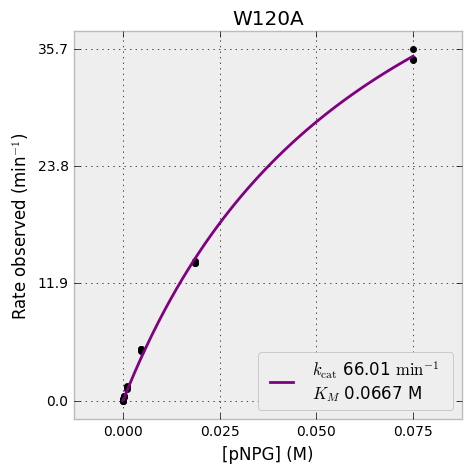

W120F 
 MM params (kcat, km): [  4.71772257e+02   1.60828218e-02] 
 linear params (slope, int): [ 5115.11014899    41.42751703]


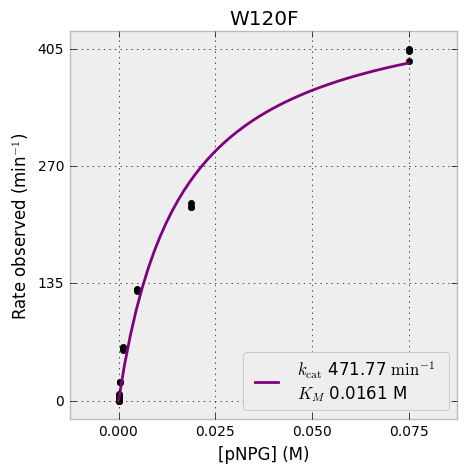

W120H 
 MM params (kcat, km): [ 84.07526357   0.08917659] 
 linear params (slope, int): [ 509.91800102    1.16288738]


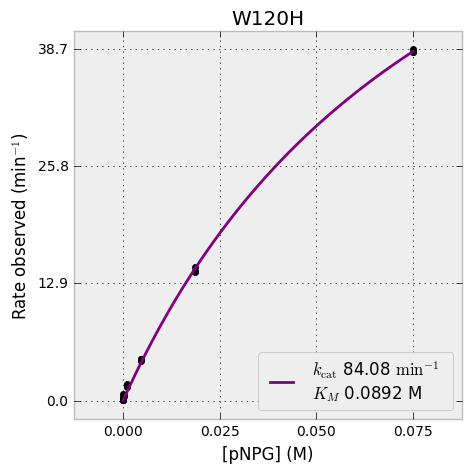

W325A 
 MM params (kcat, km): [  2.94062844e+01   1.61196559e-03] 
 linear params (slope, int): [ 297.72063702    8.23857252]


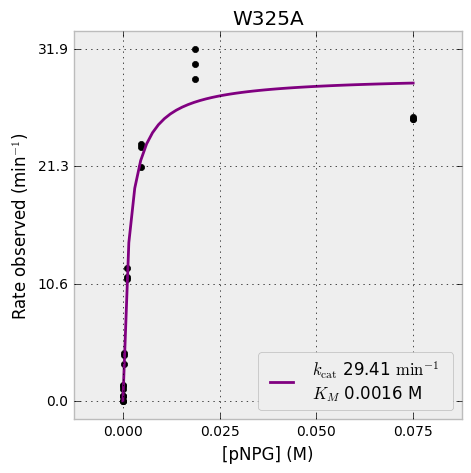

W325C 
 MM params (kcat, km): [  1.04598246e+01   4.17960217e-03] 
 linear params (slope, int): [ 118.47485958    1.90235743]


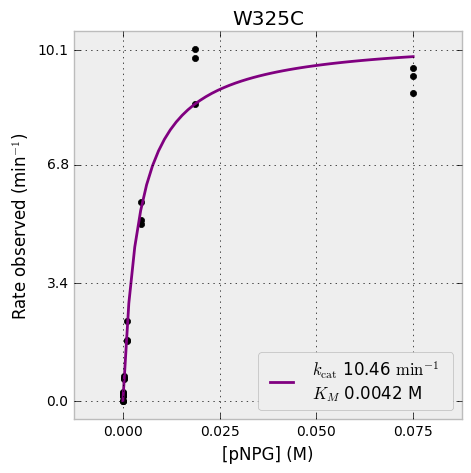

W325H 
 MM params (kcat, km): [  3.49362098e+01   3.07592741e-03] 
 linear params (slope, int): [ 383.27780334    7.46669322]


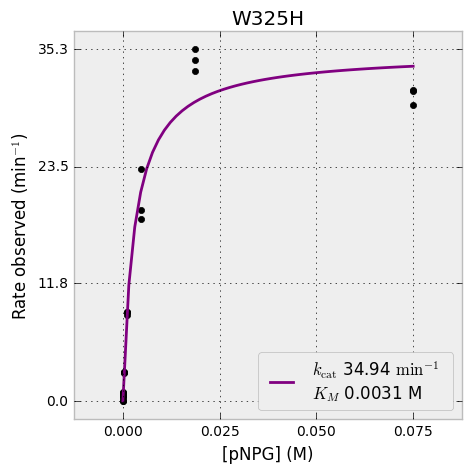

W325L 
 MM params (kcat, km): [  1.08505302e+02   5.73837696e-03] 
 linear params (slope, int): [ 1315.8479952     16.62199263]


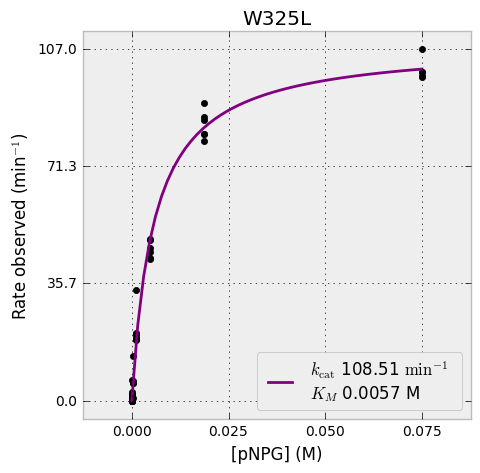

W34A 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 3.54774328  0.06040714]


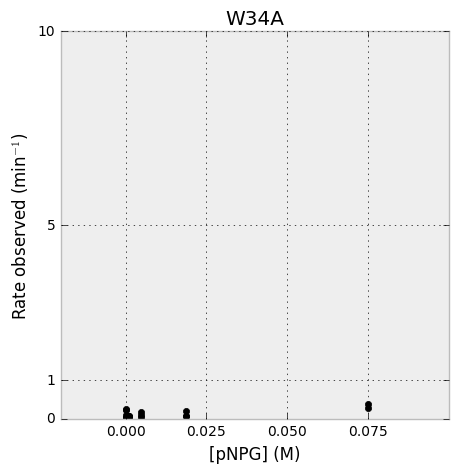

W399A 
 MM params (kcat, km): [ 0.23517171  0.01665011] 
 linear params (slope, int): [ 2.57419243  0.01773581]


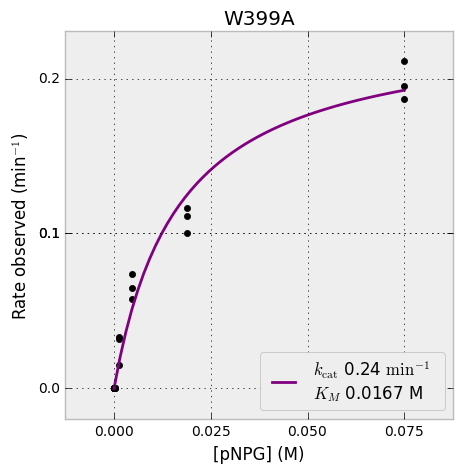

W399C 
 MM params (kcat, km): [ 2.7146267   0.07033178] 
 linear params (slope, int): [ 18.636613     0.05498077]


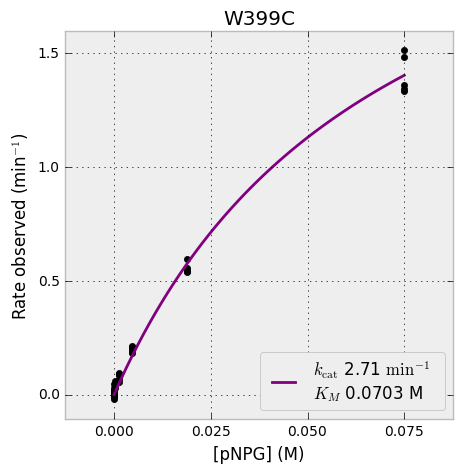

W399G 
 MM params (kcat, km): [  9.74413664e-02   5.76297622e-05] 
 linear params (slope, int): [ 1.24368906  0.05888461]


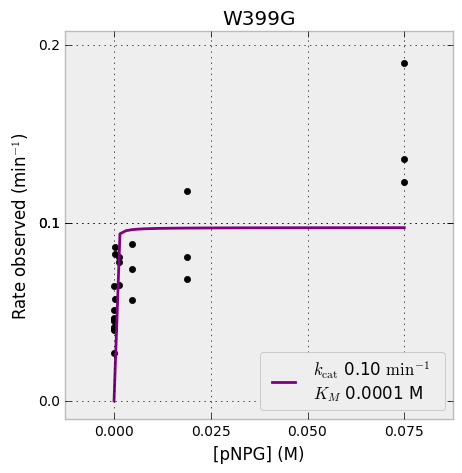

W399S 
 MM params (kcat, km): [ 0.19827592  0.02584777] 
 linear params (slope, int): [ 1.7062055  0.0284375]


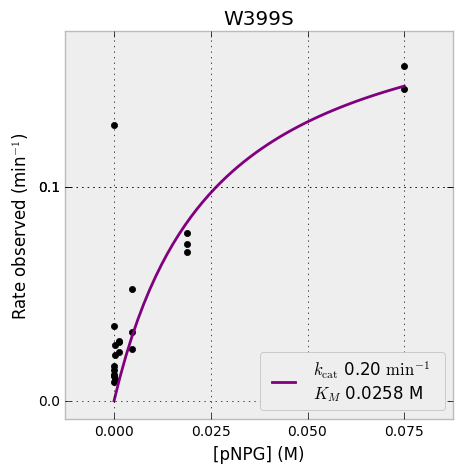

W407A 
 MM params (kcat, km): [  1.14131156e+01   7.60770527e-03] 
 linear params (slope, int): [ 131.810526      1.60236565]


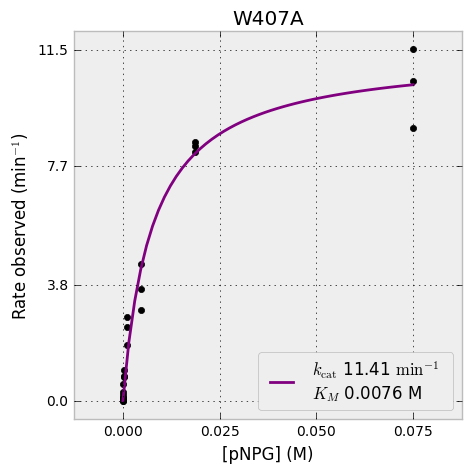

W407G 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [  9.04006891e-01  -5.65622795e-04]


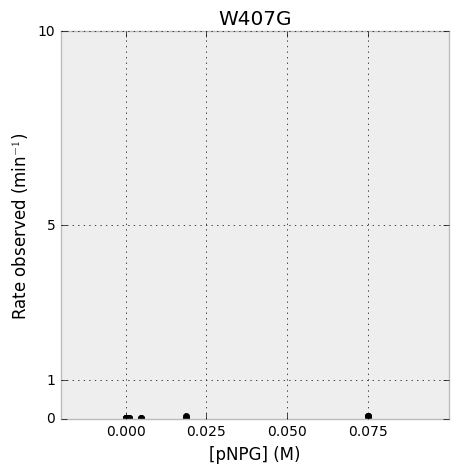

W407Q 
 MM params (kcat, km): [ 0.45305361  0.00807416] 
 linear params (slope, int): [ 5.05334615  0.08556375]


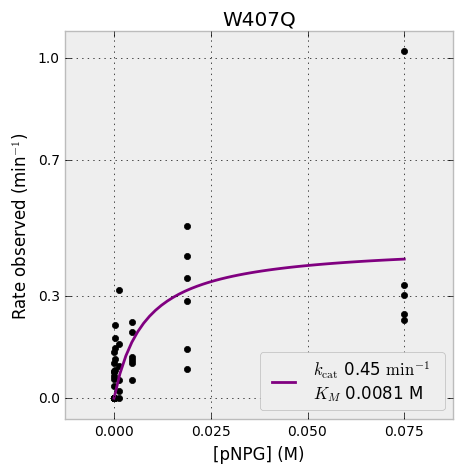

W407R 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 3.99190695  0.00457133]


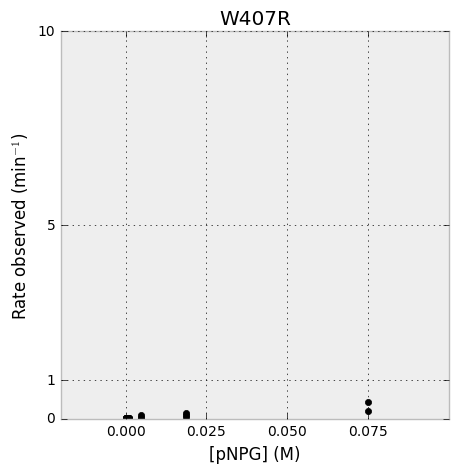

W409A 
 MM params (kcat, km): [ 0.40236959  0.03113456] 
 linear params (slope, int): [ 3.2023945   0.05316157]


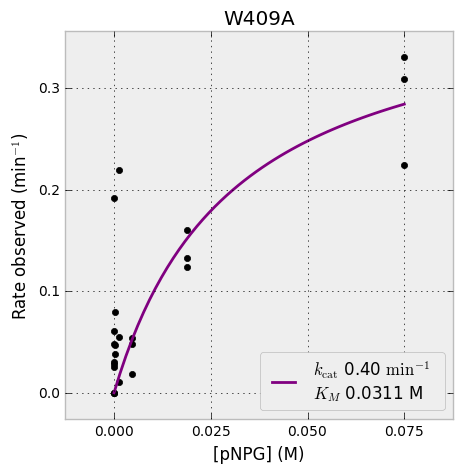

Y166P 
 MM params (kcat, km): [  2.65155704e+01   2.50246887e-03] 
 linear params (slope, int): [ 292.85798812    6.0172495 ]


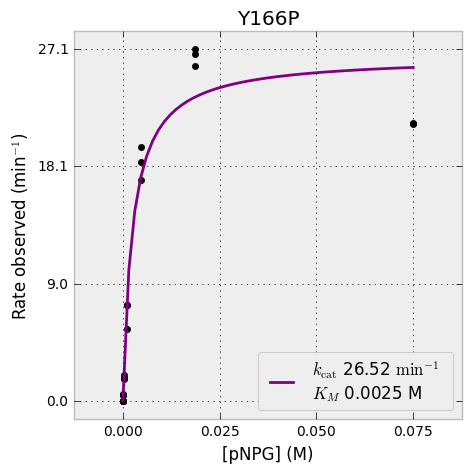

Y18A 
 MM params (kcat, km): [  1.96541784e+02   3.15469538e-02] 
 linear params (slope, int): [ 1846.60361567     8.06928123]


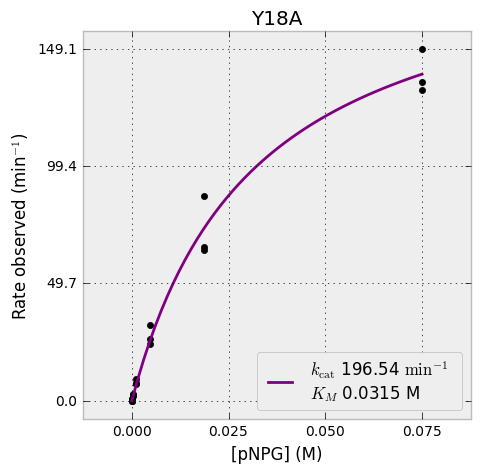

Y294A 
 MM params (kcat, km): [  1.65550512e+02   4.97745372e-03] 
 linear params (slope, int): [ 2113.28303155    26.54716158]


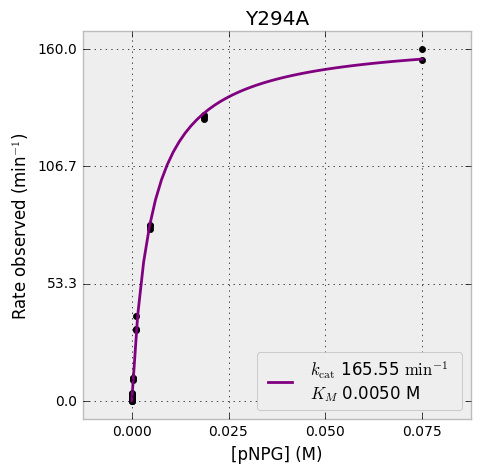

Y294F 
 MM params (kcat, km): [  7.34890565e+02   5.98684852e-03] 
 linear params (slope, int): [ 8857.72339977   107.25598799]


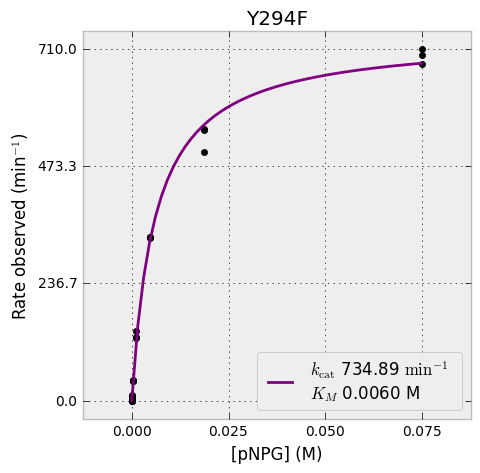

Y295A 
 MM params (kcat, km): [ 0.24788843  0.01295211] 
 linear params (slope, int): [ 2.7339902   0.02975258]


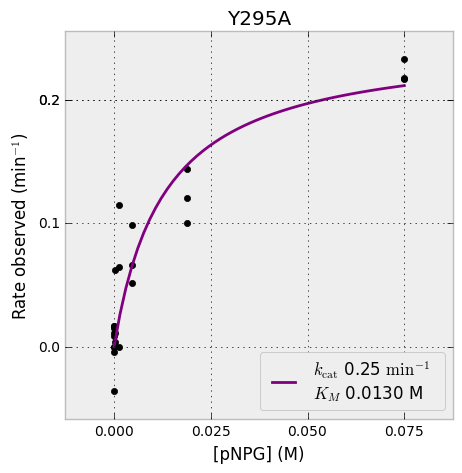

Y295G 
 MM params (kcat, km): [ nan  nan] 
 linear params (slope, int): [ 0.90406854  0.07535268]


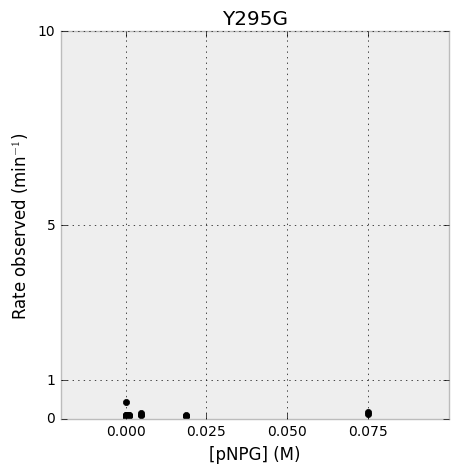

In [86]:
for i, (idx, data) in enumerate( raw.groupby( 'sample' ) ):
    
    x_vals = np.linspace( data.s.min(), data.s.max(), 50 )
    my_params = good_fits.loc[ idx ][ 0 : 2 ] # could be [ [ 'kcat', 'km' ] ] 
    my_lin = lin_fits.loc[ idx ][ [ 'lin_slope', 'lin_intercept' ] ]
    print( idx, '\n MM params (kcat, km):', my_params.values, '\n linear params (slope, int):', my_lin.values ) 

    plt.figure( figsize=( 5, 5 ) ) 
    plt.title( idx )         
    plt.xlabel( '[pNPG] (M)' ) 
    plt.ylabel( 'Rate observed (min$^{-1}$)' ) 
    plt.scatter( data.s, data.kobs, color='k' )
    plt.xticks( ( 0, .025, .05, .075 ) ) 
    plt.yticks( np.linspace( 0, data.kobs.max(), 4 ).round(1) )
    
    if 0 == len( list( filter( np.isnan, my_params ) ) ): # amazingly, checks if array contains NaN 
        plt.plot( x_vals, v( x_vals, *my_params ), color='purple' ) 
        plt.legend( [ '$k_\mathrm{{cat}}$ {0:2.2f} $\mathrm{{min}}^{{-1}}$  \n$K_M$ {1:2.4f} M'.format( *my_params ) ], loc='lower right' )
    else:
        if my_lin[ 'lin_slope' ] > 10:
            plt.plot( x_vals, lin_f( x_vals, *my_lin), color='green' )
        plt.ylim( 0, 10 ) 
        plt.yticks( ( 0, 1, 5, 10 ) ) 
        
    plt.show()

This examines data against what is the in data tables of the paper. Not good. 

In [ ]:
for index, group in g:
    plt.figure( figsize=(4,4) ) 
    
    if index in df.index:
        params = df.loc[ index ] 
        plt.title( index ) 
        plt.scatter( group.s, group.kobs, color='k' ) 
        if params.kcat > 0 and params.km > 0:
            plt.plot( x_vals, v( x_vals, params.kcat, params.km ), color='gray' ) 
        elif params.kcatkm > 0:
            plt.plot( x_vals, [ x * params.kcatkm for x in x_vals ], color='gray' ) 
        
    else:
        print( index, 'not on the master clipboard' ) 
        
    plt.show()